reference: https://www.jianshu.com/p/c3928c6cc6e2

In [10]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

In [12]:
(x_Train, y_Train_label), (x_Test, y_Test_label) = mnist.load_data()
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
y_Train = np_utils.to_categorical(y_Train_label)
y_Test = np_utils.to_categorical(y_Test_label)

In [8]:
def plot_image_labels_prediction(image,lables,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:
        num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(image[idx],cmap='binary')
        title="lable="+str(lables[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

In [7]:
# show the process of training
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [21]:
model = Sequential()
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_Train,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 15s - loss: 0.5182 - accuracy: 0.8372 - val_loss: 0.1040 - val_accuracy: 0.9680
Epoch 2/20
 - 15s - loss: 0.1449 - accuracy: 0.9560 - val_loss: 0.0705 - val_accuracy: 0.9792
Epoch 3/20
 - 15s - loss: 0.1043 - accuracy: 0.9692 - val_loss: 0.0542 - val_accuracy: 0.9837
Epoch 4/20
 - 15s - loss: 0.0836 - accuracy: 0.9743 - val_loss: 0.0484 - val_accuracy: 0.9849
Epoch 5/20
 - 15s - loss: 0.0723 - accuracy: 0.9787 - val_loss: 0.0411 - val_accuracy: 0.9883
Epoch 6/20
 - 15s - loss: 0.0627 - accuracy: 0.9809 - val_loss: 0.0366 - val_accuracy: 0.9892
Epoch 7/20
 - 15s - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.0378 - val_accuracy: 0.9894
Epoch 8/20
 - 15s - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.0358 - val_accuracy: 0.9893
Epoch 9/20
 - 15s - loss: 0.0453 - accuracy: 0.9867 - val_loss: 0.0339 - val_accuracy: 0.9896
Epoch 10/20
 - 15s - loss: 0.0399 - accuracy: 0.9882 - val_loss: 0.0331 - val_accuracy: 0.9908
Epoch 11/

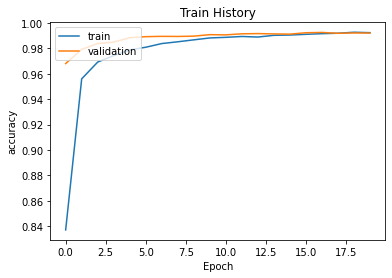

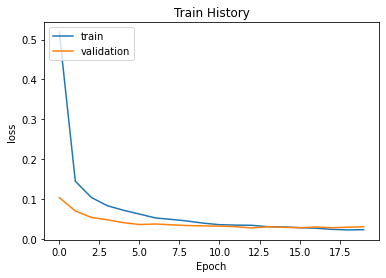

10000/10000 [==============================] - 1s 127us/step
accuracy 0.9930999875068665


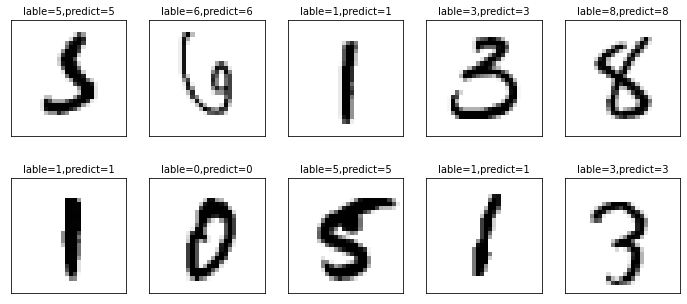

In [23]:
show_train_history(train_history,'accuracy','val_accuracy')   
show_train_history(train_history,'loss','val_loss') 

# evaluate the accuracy
scores=model.evaluate(x_Test4D_normalize,y_Test)   
print('accuracy',scores[1])

# do the prediction
prediction=model.predict_classes(x_Test4D_normalize)
prediction
plot_image_labels_prediction(x_Test,y_Test_label,prediction,idx=340)